In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import pandas_datareader as data


In [3]:
!pip install yfinance

     ---------------------------------------- 60.3/60.3 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00


In [4]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404016,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392175,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434674,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355141,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421074,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798401,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771530,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191566,144114400


In [6]:
df =  df.reset_index()

In [7]:
df= df.drop(['Date','Adj Close'],axis = 1)
df.head()


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


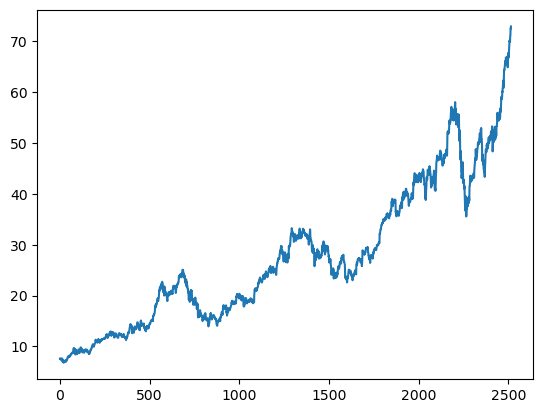

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

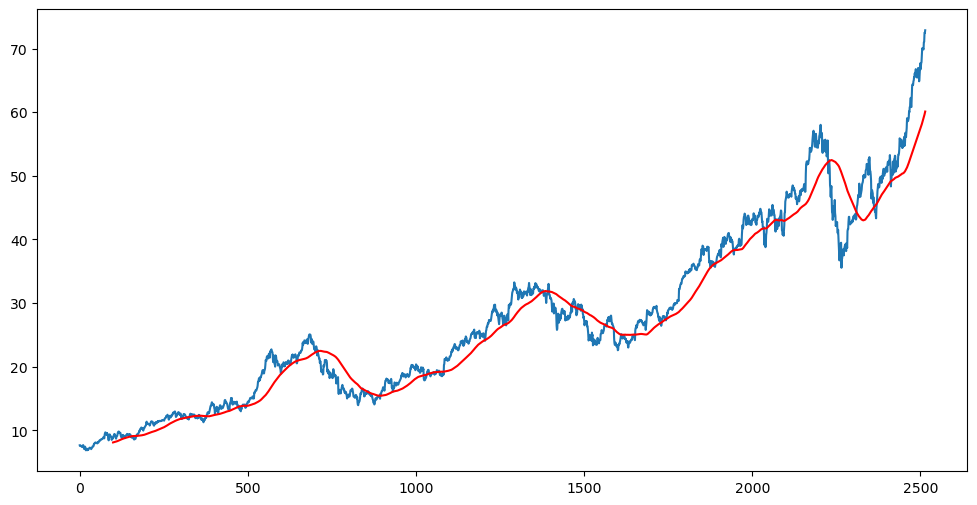

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(100).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

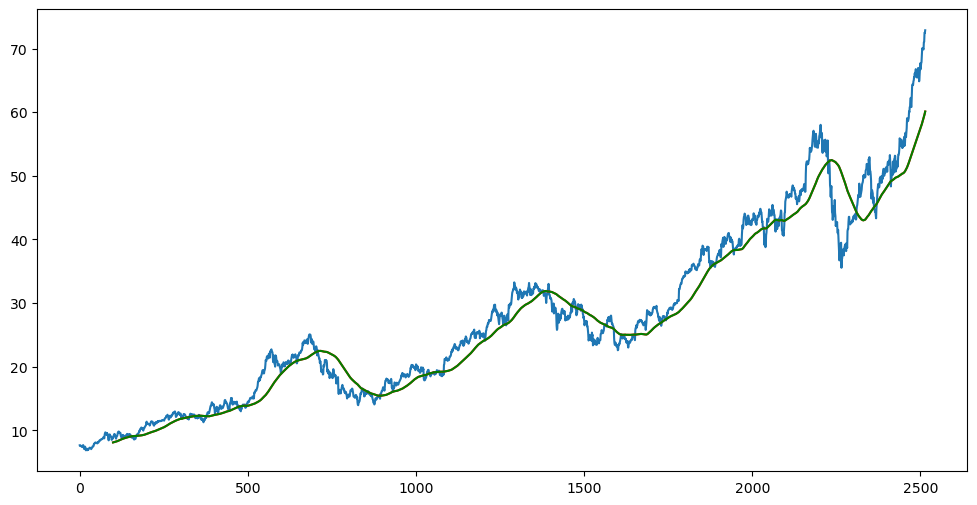

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(2515, 5)

In [19]:
#splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape )

(1760, 1)
(755, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [22]:
data_training.shape

(1760, 1)

In [23]:
 x_train = []
 y_train = []
 for i in range(100,data_training_array.shape[0]):
      x_train.append(data_training_array[i-100:i])
      y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)  

In [24]:
x_train.shape

(1660, 100, 1)

In [26]:
#ML Model
!pip install tensorflow


     -------------------------------------- 272.8/272.8 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 5.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 1.5/1.5 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 422.5/422.5 kB 4.4 MB/s eta 0:00:00
     ---------------------------------

In [28]:
import tensorflow.keras as keras

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [29]:
model = Sequential()

#1st layer
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))

#2nd layer
model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))

#3rd layer
model.add(LSTM(units = 80,activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))

#4th layer
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

#dense layer
model.add(Dense(units=1))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [31]:
model.compile(optimizer = 'adam',loss =  'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 30s 313ms/step - loss: 0.0884
Epoch 2/50
52/52 [==============================] - 14s 270ms/step - loss: 0.0156
Epoch 3/50
52/52 [==============================] - 15s 293ms/step - loss: 0.0116
Epoch 4/50
52/52 [==============================] - 16s 299ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 15s 294ms/step - loss: 0.0096
Epoch 6/50
52/52 [==============================] - 15s 287ms/step - loss: 0.0093
Epoch 7/50
52/52 [==============================] - 15s 297ms/step - loss: 0.0085
Epoch 8/50
52/52 [==============================] - 15s 290ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 14s 276ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 15s 278ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 14s 277ms/step - loss: 0.0080
Epoch 12/50
52/52 [==============================] - 15s 291ms/step - loss: 0.0079
Epoch 13/50
5

In [32]:
model.save('keras_model.h5')

In [33]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [34]:
past_100_days = data_training.tail(100)

In [38]:


final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [39]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [42]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [43]:
input_data.shape

(855, 1)

In [45]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [46]:
x_test,y_test = np.array(x_test),np.array(y_test)

In [47]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [48]:
#making predictions
y_predicted = model.predict(x_test)


24/24 [==============================] - 4s 108ms/step


In [49]:
y_predicted.shape

(755, 1)

In [50]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [51]:
y_predicted

array([[0.1439414 ],
       [0.14466964],
       [0.14529383],
       [0.14579257],
       [0.14615637],
       [0.14639223],
       [0.14653303],
       [0.14663032],
       [0.14673138],
       [0.14687574],
       [0.14708315],
       [0.14735296],
       [0.1476863 ],
       [0.1480821 ],
       [0.148529  ],
       [0.14901274],
       [0.14951912],
       [0.15003164],
       [0.15055802],
       [0.15111303],
       [0.15170255],
       [0.15231964],
       [0.15294614],
       [0.1536594 ],
       [0.15455157],
       [0.15568084],
       [0.15708607],
       [0.15879221],
       [0.16080217],
       [0.1630957 ],
       [0.16562453],
       [0.16833922],
       [0.17121075],
       [0.17421308],
       [0.17730662],
       [0.18044686],
       [0.1836029 ],
       [0.18675105],
       [0.1898597 ],
       [0.19289915],
       [0.19583428],
       [0.19864656],
       [0.20135863],
       [0.20398432],
       [0.20653719],
       [0.20901679],
       [0.21141405],
       [0.213

In [52]:
scaler.scale_

array([0.02123255])

In [53]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test * scale_factor

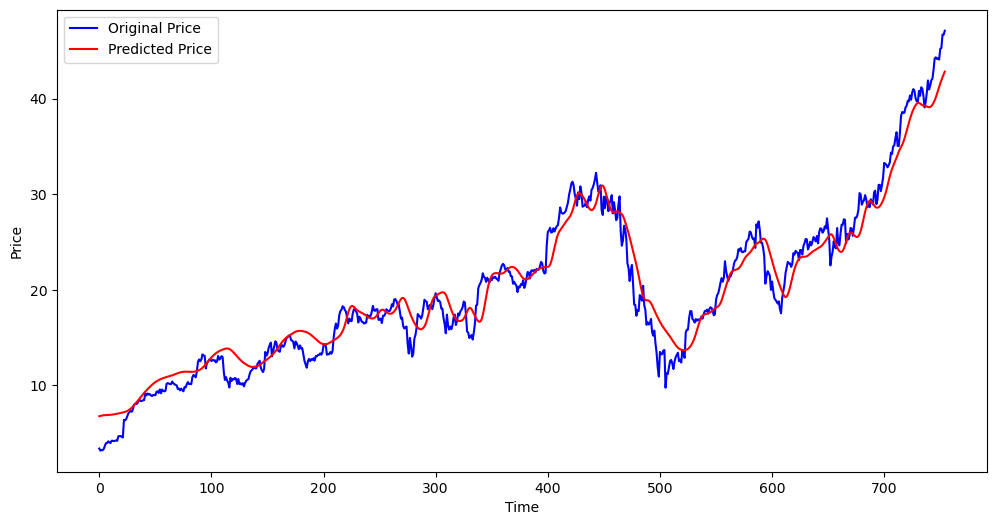

In [54]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()